#### third try: clustering activities based on features extracted from their multivariate timeseries
#### mean, mittelwert, standarabweichung, perzentile, etc.

In [1]:
from Garmin_Handler.Handler import Overview_File_Reader, Activity_Handler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import os
import glob
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"C:\Users\nicoj\netcase\1-Start-UP\Triathlon\Aktivitaeten_csv_2")
act_list = []
for file in glob.glob("*.*"):
    if str(file).count("Laufen")==1 and str(file).count("_")<2:
        act_list.append(file)
len(act_list)

70

In [74]:
nf_df = pd.DataFrame([], columns = ["speed_mean", "speed_std", "speed_max", "speed_min",
                                   "hr_mean", "hr_std", "hr_max", "hr_min",
                                   "alt_mean", "alt_std", "alt_max", "alt_min", "activity_name"])
for activity in range(len(act_list)):
    df1 = pd.read_csv(act_list[activity], index_col = 0).iloc[:,2:5]
    test = [0,0,0,0,0,0,0,0,0,0,0,0, 0]
    test[0] = df1["enhanced_speed"].mean()
    test[1] = df1["enhanced_speed"].std()
    test[2] = df1["enhanced_speed"].max()
    test[3] = df1["enhanced_speed"].min()
    test[4] = df1["heart_rate"].mean()
    test[5] = df1["heart_rate"].std()
    test[6] = df1["heart_rate"].max()
    test[7] = df1["heart_rate"].min()
    test[8] = df1["enhanced_altitude"].mean()
    test[9] = df1["enhanced_altitude"].std()
    test[10] = df1["enhanced_altitude"].max()
    test[11] = df1["enhanced_altitude"].min()
    test[12] = str(act_list[activity])
    nf_df.loc[activity,:] = test
nf_df.fillna(0, inplace = True)

In [81]:
nf_df

,speed_mean,speed_std,speed_max,speed_min,hr_mean,hr_std,hr_max,hr_min,alt_mean,alt_std,alt_max,alt_min,activity_name
0,2.243954,0.558368,3.546,0.000,157.535865,13.854414,175.0,104.0,-18.824051,4.955652,-0.4,-24.4,Laufen_20200402-173402.csv
1,2.430052,0.376950,3.144,0.000,166.437811,7.099040,176.0,121.0,-13.540299,5.332292,-4.2,-23.6,Laufen_20200405-134751.csv
2,1.868480,0.589066,4.395,0.103,126.537791,21.485469,156.0,88.0,-23.190116,1.249520,-18.8,-25.2,Laufen_20200408-203605.csv
3,2.322880,0.317179,3.219,0.000,150.010417,4.848479,156.0,127.0,72.292708,1.841110,76.6,69.6,Laufen_20200412-105823.csv
4,2.211705,0.308743,2.771,0.000,150.259825,4.786487,162.0,125.0,78.241921,7.916047,100.0,70.6,Laufen_20200415-203350.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2.371220,0.160875,3.200,0.056,134.659371,6.460451,147.0,73.0,243.416076,3.550701,255.2,239.0,Laufen_20201203-143233.csv
66,2.835317,0.268629,4.320,0.000,153.962040,7.567027,180.0,95.0,235.154674,1.571539,240.2,232.6,Laufen_20201204-153926.csv
67,2.382738,0.156443,3.060,0.000,141.112684,3.889514,155.0,99.0,202.986353,4.552856,215.4,195.4,Laufen_20201206-110106.csv
68,2.562521,0.439463,4.824,0.000,141.262956,11.173659,183.0,91.0,243.096353,4.354185,249.8,237.0,Laufen_20201208-115815.csv


In [75]:
X = nf_df.iloc[:,:-1]
X

,speed_mean,speed_std,speed_max,speed_min,hr_mean,hr_std,hr_max,hr_min,alt_mean,alt_std,alt_max,alt_min
0,2.243954,0.558368,3.546,0.000,157.535865,13.854414,175.0,104.0,-18.824051,4.955652,-0.4,-24.4
1,2.430052,0.376950,3.144,0.000,166.437811,7.099040,176.0,121.0,-13.540299,5.332292,-4.2,-23.6
2,1.868480,0.589066,4.395,0.103,126.537791,21.485469,156.0,88.0,-23.190116,1.249520,-18.8,-25.2
3,2.322880,0.317179,3.219,0.000,150.010417,4.848479,156.0,127.0,72.292708,1.841110,76.6,69.6
4,2.211705,0.308743,2.771,0.000,150.259825,4.786487,162.0,125.0,78.241921,7.916047,100.0,70.6
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2.371220,0.160875,3.200,0.056,134.659371,6.460451,147.0,73.0,243.416076,3.550701,255.2,239.0
66,2.835317,0.268629,4.320,0.000,153.962040,7.567027,180.0,95.0,235.154674,1.571539,240.2,232.6
67,2.382738,0.156443,3.060,0.000,141.112684,3.889514,155.0,99.0,202.986353,4.552856,215.4,195.4
68,2.562521,0.439463,4.824,0.000,141.262956,11.173659,183.0,91.0,243.096353,4.354185,249.8,237.0


In [76]:
X.isnull().sum(axis =0)

speed_mean    0
speed_std     0
speed_max     0
speed_min     0
hr_mean       0
hr_std        0
hr_max        0
hr_min        0
alt_mean      0
alt_std       0
alt_max       0
alt_min       0
dtype: int64

In [77]:
# clustering with kmeans dtw:
from tslearn.clustering import TimeSeriesKMeans

model = KMeans(n_clusters=5, max_iter=10, random_state=0)
model.fit(X)


KMeans(max_iter=10, n_clusters=5, random_state=0)

In [87]:
len(model.labels_)
len(run_data)

75

In [83]:
# checken, ob das Sinn ergbit:
#1) Laufdaten einlesen und filtern in alle die auch in der Liste sind.
activities = Overview_File_Reader().read_file()
run_data = Activity_Handler(activities).run_data()


# 2) Labels zu den run_daten hinzufügen.

run_wl = pd.concat([ pd.Series(model.labels_, name = "labels"), run_like_files],axis = 1)
run_wl0 = run_wl[run_wl["labels"]==0]
run_wl1 = run_wl[run_wl["labels"]==1]
run_wl2 = run_wl[run_wl["labels"]==2]
run_wl3 = run_wl[run_wl["labels"]==3]
run_wl4 = run_wl[run_wl["labels"]==4]


C:\Users\nicoj\python_projects\Garmin_Handler\Garmin_Handler\Handler.py:33: UserWarning: Standard-path has been chosen by default. Enter path to overviewfile to change this.
  warnings.warn("Standard-path has been chosen by default. Enter path to overviewfile to change this.",stacklevel=1)
C:\Users\nicoj\anaconda3\envs\tria\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [84]:
run_wl0

,labels,Aktivitätstyp,Datum,Favorit,Titel,Distanz,Kalorien,Zeit,Ø Herzfrequenz,Maximale Herzfrequenz,...,Beste Rundenzeit,Anzahl der Runden,Maximale Temperatur,Year,Month,Week,Minutes,Total time in Minutes,pace_decimal,best pace_decimal
0,0,Laufen,2020-10-22 17:40:11,False,Freiburg im Breisgau - Zone 2,8.29,635.0,2020-12-20 00:59:46,136.0,145.0,...,00:24.20,3.0,0.0,2020.0,10.0,42,59.0,59.0,7.216667,5.616667
1,0,Laufen,2020-10-20 13:47:14,False,Freiburg im Breisgau - 400m Intervalle,4.45,329.0,2020-12-20 00:29:04,140.0,165.0,...,01:40.12,9.0,0.0,2020.0,10.0,42,29.0,29.0,6.533333,4.100000
2,0,Laufen,2020-10-19 10:16:23,False,Waldems - Zone 2,8.29,649.0,2020-12-20 01:00:38,141.0,177.0,...,04:31.36,3.0,0.0,2020.0,10.0,42,0.0,60.0,7.316667,2.116667
3,0,Laufen,2020-10-17 07:08:41,False,Langeoog Laufen,9.01,685.0,2020-12-20 00:58:57,143.0,168.0,...,00:03.13,10.0,0.0,2020.0,10.0,41,58.0,58.0,6.550000,5.516667
4,0,Laufen,2020-10-16 07:09:25,False,Langeoog Laufen,7.77,632.0,2020-12-20 00:48:30,150.0,178.0,...,04:07.60,8.0,0.0,2020.0,10.0,41,48.0,48.0,6.250000,1.850000
5,0,Laufen,2020-10-12 17:39:33,False,Freiburg im Breisgau Laufen,10.21,741.0,2020-12-20 01:15:10,135.0,143.0,...,01:36.83,11.0,0.0,2020.0,10.0,41,15.0,75.0,7.366667,5.700000
6,0,Laufen,2020-10-09 16:36:35,False,Freiburg im Breisgau Laufen,10.00,820.0,2020-12-20 00:57:01,160.0,171.0,...,00:01.22,11.0,0.0,2020.0,10.0,40,57.0,57.0,5.700000,4.783333
7,0,Laufen,2020-10-07 18:53:47,False,Freiburg im Breisgau Laufen,8.01,617.0,2020-12-20 00:59:35,139.0,145.0,...,00:02.58,9.0,0.0,2020.0,10.0,40,59.0,59.0,7.433333,6.350000
8,0,Laufen,2020-10-05 19:44:14,False,Freiburg im Breisgau Laufen,4.19,374.0,2020-12-20 00:25:56,156.0,165.0,...,01:13.96,5.0,0.0,2020.0,10.0,40,25.0,25.0,6.200000,4.966667
9,0,Laufen,2020-09-29 10:48:45,False,Waldems Laufen,8.28,700.0,2020-12-20 00:54:38,148.0,168.0,...,01:38.92,9.0,0.0,2020.0,9.0,39,54.0,54.0,6.600000,3.833333


In [85]:
run_wl1

,labels,Aktivitätstyp,Datum,Favorit,Titel,Distanz,Kalorien,Zeit,Ø Herzfrequenz,Maximale Herzfrequenz,...,Beste Rundenzeit,Anzahl der Runden,Maximale Temperatur,Year,Month,Week,Minutes,Total time in Minutes,pace_decimal,best pace_decimal
21,1,Laufen,2020-07-06 19:39:10,False,Freiburg im Breisgau Laufen,7.83,583.0,2020-12-20 00:59:11,131.0,138.0,...,06:43.73,8.0,0.0,2020.0,7.0,27,59.0,59.0,7.566667,6.016667
22,1,Laufen,2020-06-30 20:31:04,False,Freiburg im Breisgau Laufen,10.02,957.0,2020-12-20 01:05:42,155.0,178.0,...,00:04.62,11.0,0.0,2020.0,6.0,26,5.0,65.0,6.566667,5.000000
23,1,Laufen,2020-06-24 18:55:05,False,Osnabrück Laufen,6.76,625.0,2020-12-20 00:43:30,154.0,166.0,...,04:55.50,7.0,0.0,2020.0,6.0,25,43.0,43.0,6.433333,4.816667
25,1,Laufen,2020-06-19 18:21:58,False,Osnabrück Laufen,7.05,715.0,2020-12-20 00:46:48,NaN,NaN,...,00:15.04,8.0,0.0,2020.0,6.0,24,46.0,46.0,6.633333,4.900000
26,1,Laufen,2020-06-18 12:29:34,False,Osnabrück Laufen,3.51,303.0,2020-12-20 00:22:01,149.0,162.0,...,03:19.24,4.0,0.0,2020.0,6.0,24,22.0,22.0,6.266667,5.083333
27,1,Laufen,2020-06-03 21:18:09,False,Osnabrück Laufen,3.33,282.0,2020-12-20 00:22:25,142.0,149.0,...,02:15.63,4.0,0.0,2020.0,6.0,22,22.0,22.0,6.733333,5.916667
28,1,Laufen,2020-05-24 12:12:05,False,Osnabrück - W07D6-Langer Lauf,10.01,978.0,2020-12-20 01:14:23,150.0,175.0,...,14:23.45,2.0,0.0,2020.0,5.0,20,14.0,74.0,7.433333,5.383333
29,1,Laufen,2020-05-17 12:48:03,False,Osnabrück - W06D6b-Tempolauf,3.48,293.0,2020-12-20 00:20:02,158.0,170.0,...,00:02.47,3.0,0.0,2020.0,5.0,19,20.0,20.0,5.750000,4.250000
31,1,Laufen,2020-05-11 19:48:12,False,Osnabrück - W05D7-Langer Lauf,7.41,672.0,2020-12-20 00:51:16,149.0,157.0,...,01:16.23,2.0,0.0,2020.0,5.0,19,51.0,51.0,6.916667,5.783333
32,1,Laufen,2020-05-07 18:39:57,False,Osnabrück - W05D3-Lockerer Lauf,5.22,463.0,2020-12-20 00:34:39,149.0,159.0,...,01:30.47,3.0,0.0,2020.0,5.0,18,34.0,34.0,6.633333,4.350000


In [86]:
run_wl2

,labels,Aktivitätstyp,Datum,Favorit,Titel,Distanz,Kalorien,Zeit,Ø Herzfrequenz,Maximale Herzfrequenz,...,Beste Rundenzeit,Anzahl der Runden,Maximale Temperatur,Year,Month,Week,Minutes,Total time in Minutes,pace_decimal,best pace_decimal
54,2,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
55,2,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN


In [82]:
run_wl3

,labels,Aktivitätstyp,Datum,Favorit,Titel,Distanz,Kalorien,Zeit,Ø Herzfrequenz,Maximale Herzfrequenz,...,Beste Rundenzeit,Anzahl der Runden,Maximale Temperatur,Year,Month,Week,Minutes,Total time in Minutes,pace_decimal,best pace_decimal
3,3,Laufen,2020-10-17 07:08:41,False,Langeoog Laufen,9.01,685.0,2020-12-19 00:58:57,143.0,168.0,...,00:03.13,10,0.0,2020,10,41,58,58,6.550000,5.516667
23,3,Laufen,2020-06-24 18:55:05,False,Osnabrück Laufen,6.76,625.0,2020-12-19 00:43:30,154.0,166.0,...,04:55.50,7,0.0,2020,6,25,43,43,6.433333,4.816667
24,3,Laufen,2020-06-22 17:23:56,False,Osnabrück Laufen,7.31,644.0,2020-12-19 00:44:48,157.0,220.0,...,01:43.59,8,0.0,2020,6,25,44,44,6.133333,3.700000
27,3,Laufen,2020-06-03 21:18:09,False,Osnabrück Laufen,3.33,282.0,2020-12-19 00:22:25,142.0,149.0,...,02:15.63,4,0.0,2020,6,22,22,22,6.733333,5.916667
29,3,Laufen,2020-05-17 12:48:03,False,Osnabrück - W06D6b-Tempolauf,3.48,293.0,2020-12-19 00:20:02,158.0,170.0,...,00:02.47,3,0.0,2020,5,19,20,20,5.750000,4.250000
30,3,Laufen,2020-05-14 17:05:01,False,Osnabrück - W06D3-Lockerer Lauf,5.26,526.0,2020-12-19 00:35:04,NaN,NaN,...,00:01.90,3,0.0,2020,5,19,35,35,6.666667,4.683333
33,3,Laufen,2020-05-06 18:49:22,False,Osnabrück Laufen,7.02,623.0,2020-12-19 00:46:32,153.0,159.0,...,00:04.32,9,0.0,2020,5,18,46,46,6.633333,5.633333
37,3,Laufen,2020-04-21 13:54:23,False,Osnabrück - W03D1-Technik-Lauftraining,6.04,545.0,2020-12-19 00:39:48,155.0,173.0,...,01:00.00,15,0.0,2020,4,16,39,39,6.600000,4.016667
39,3,Laufen,2020-04-15 20:33:50,False,Osnabrück - W02D2-Langer Lauf,6.19,510.0,2020-12-19 00:45:12,151.0,162.0,...,00:11.79,2,0.0,2020,4,15,45,45,7.300000,5.900000
41,3,Laufen,2020-04-08 20:36:05,False,Osnabrück - W01D2-Lockerer Lauf,3.73,260.0,2020-12-19 00:31:31,130.0,157.0,...,00:01.46,4,0.0,2020,4,14,31,31,8.450000,3.800000


In [83]:
run_wl4

,labels,Aktivitätstyp,Datum,Favorit,Titel,Distanz,Kalorien,Zeit,Ø Herzfrequenz,Maximale Herzfrequenz,...,Beste Rundenzeit,Anzahl der Runden,Maximale Temperatur,Year,Month,Week,Minutes,Total time in Minutes,pace_decimal,best pace_decimal
4,4,Laufen,2020-10-16 07:09:25,False,Langeoog Laufen,7.77,632.0,2020-12-19 00:48:30,150.0,178.0,...,04:07.60,8,0.0,2020,10,41,48,48,6.250000,1.850000
5,4,Laufen,2020-10-12 17:39:33,False,Freiburg im Breisgau Laufen,10.21,741.0,2020-12-19 01:15:10,135.0,143.0,...,01:36.83,11,0.0,2020,10,41,15,75,7.366667,5.700000
6,4,Laufen,2020-10-09 16:36:35,False,Freiburg im Breisgau Laufen,10.00,820.0,2020-12-19 00:57:01,160.0,171.0,...,00:01.22,11,0.0,2020,10,40,57,57,5.700000,4.783333
8,4,Laufen,2020-10-05 19:44:14,False,Freiburg im Breisgau Laufen,4.19,374.0,2020-12-19 00:25:56,156.0,165.0,...,01:13.96,5,0.0,2020,10,40,25,25,6.200000,4.966667
10,4,Laufen,2020-09-19 15:58:02,False,Freiburg im Breisgau Laufen,5.20,438.0,2020-12-19 00:29:57,160.0,181.0,...,01:07.59,6,0.0,2020,9,37,29,29,5.766667,4.550000
11,4,Laufen,2020-09-16 17:38:52,False,Freiburg im Breisgau Laufen,4.74,361.0,2020-12-19 00:34:42,137.0,151.0,...,06:03.72,5,0.0,2020,9,37,34,34,7.316667,5.833333
12,4,Laufen,2020-09-08 18:19:46,True,Freiburg im Breisgau Laufen,5.01,399.0,2020-12-19 00:25:25,174.0,184.0,...,00:03.83,6,0.0,2020,9,36,25,25,5.066667,4.200000
13,4,Laufen,2020-08-27 09:37:23,False,Rapallo Laufen,5.12,491.0,2020-12-19 00:33:01,NaN,NaN,...,00:56.33,6,0.0,2020,8,34,33,33,6.450000,4.933333
15,4,Laufen,2020-08-13 20:17:22,False,Freiburg im Breisgau Laufen,7.62,527.0,2020-12-19 00:56:11,131.0,143.0,...,04:53.78,8,0.0,2020,8,32,56,56,7.383333,6.183333
16,4,Laufen,2020-08-07 13:55:19,False,Freiburg im Breisgau Laufen,4.01,322.0,2020-12-19 00:23:10,157.0,181.0,...,00:03.38,5,0.0,2020,8,31,23,23,5.783333,3.633333


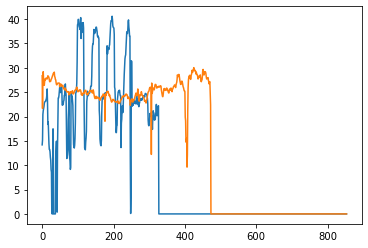

In [168]:
plt.plot(dfs.iloc[-2,:])
plt.plot(dfs.iloc[-4,:])


In [ ]:
plt.plot(dfs.iloc[15,:])
